In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.metrics import log_loss, auc, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold




import missingno
import sklearn

from imblearn.over_sampling import SMOTE
import scikitplot as skplt

from xgboost import XGBClassifier
from xgboost import plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

# File located in google drive
url = "https://drive.google.com/uc?export=download&id=1FQnI3goUey1H8GtrrzUV4uSB2Htx0cB2"

file = requests.get(url).content
df = pd.read_csv(io.StringIO(file.decode('utf-8')))



In [8]:
df.groupby(df.columns.tolist(),as_index=False).size()

age  job      marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
18   student  single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
                                                                               13   nov    210       1          93    1         success   yes    1
                                            1944     no       no    telephone  10   aug    122       3         -1     0         unknown   no     1
                        secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no     1
                                            156      no       no    cellular   4    nov    298       2          82    4         other     no     1
                                                                                                                           

In [11]:
# Look at the top rows in the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
df.shape

(45211, 17)

In [4]:
# Understand the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Get in the list "categorical_columns" the columns that are type "object"
s = (df.dtypes == 'object')
categorical_columns = list(s[s].index)

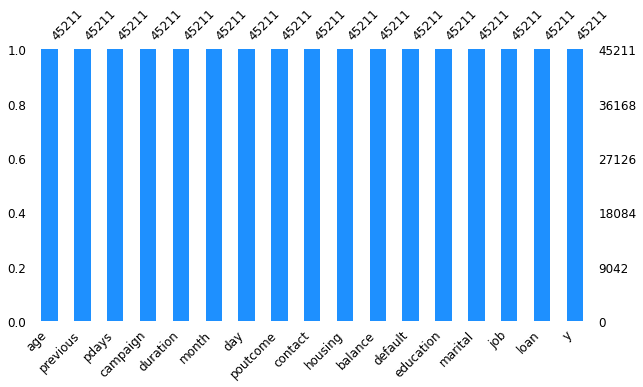

In [6]:
# Plot the columns that are missing data
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [7]:
# Look at the % of missing data for each column

for col in df.columns:
    null_val = df[col].isnull().sum()
    null_prec = (null_val * 100) / df.shape[0]
    print('> %s , Unknown: %d (%.1f%%)' % (col, null_val, null_prec))

> age , Unknown: 0 (0.0%)
> job , Unknown: 0 (0.0%)
> marital , Unknown: 0 (0.0%)
> education , Unknown: 0 (0.0%)
> default , Unknown: 0 (0.0%)
> balance , Unknown: 0 (0.0%)
> housing , Unknown: 0 (0.0%)
> loan , Unknown: 0 (0.0%)
> contact , Unknown: 0 (0.0%)
> day , Unknown: 0 (0.0%)
> month , Unknown: 0 (0.0%)
> duration , Unknown: 0 (0.0%)
> campaign , Unknown: 0 (0.0%)
> pdays , Unknown: 0 (0.0%)
> previous , Unknown: 0 (0.0%)
> poutcome , Unknown: 0 (0.0%)
> y , Unknown: 0 (0.0%)


In [8]:
# Understand the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
# Use this step and change the variable to extract the distinct values of each column
df.contact.unique()

array([nan,  1.,  2.])

In [10]:
# Create the mapping for each categorical column 

job_map = {
    'management' : 1,
    'technician' : 2,
    'entrepreneur' : 3,
    'blue-collar' : 4,
    'retired' : 5,
    'admin.' : 6,
    'services' : 7,
    'self-employed' : 8,
    'unemployed' : 9,
    'housemaid' : 10,
    'student' : 11
}

marital_map = {
    'married' : 1,
    'single' : 2,
    'divorced' : 3
}

education_map = {
    'tertiary' : 1,
    'secondary' : 2,
    'primary' : 3
}

contact_map = {
    'cellular' : 1,
    'telephone' : 2
}

poutcome_map = {
    'failure' : 1,
    'other' : 2,
    'success' : 3
}




df['job'] = df.job.map(job_map)
df['marital'] = df.marital.map(marital_map)
df['education'] = df.education.map(education_map)
df['contact'] = df.contact.map(contact_map)
df['poutcome'] = df.poutcome.map(poutcome_map)

df.loc[:,'default'] = LabelEncoder().fit_transform(df.loc[:,'default'])
df.loc[:,'housing'] = LabelEncoder().fit_transform(df.loc[:,'housing'])
df.loc[:,'loan'] = LabelEncoder().fit_transform(df.loc[:,'loan'])
df.loc[:,'y'] = LabelEncoder().fit_transform(df.loc[:,'y'])

In [11]:
# Look at the data to make sure all columns are numeric and it also includes empty points
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1.0,1,1.0,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,2.0,2,2.0,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,3.0,1,2.0,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,4.0,1,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0
5,35,1.0,1,1.0,0,231,1,0,NaN,5,may,139,1,-1,0,NaN,0
6,28,1.0,2,1.0,0,447,1,1,NaN,5,may,217,1,-1,0,NaN,0
7,42,3.0,3,1.0,1,2,1,0,NaN,5,may,380,1,-1,0,NaN,0
8,58,5.0,1,3.0,0,121,1,0,NaN,5,may,50,1,-1,0,NaN,0
9,43,2.0,2,2.0,0,593,1,0,NaN,5,may,55,1,-1,0,NaN,0


In [14]:
df.drop(['day', 'month'], axis = 1)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,1.0,1,1.0,0,2143,1,0,NaN,261,1,-1,0,NaN,0
1,44,2.0,2,2.0,0,29,1,0,NaN,151,1,-1,0,NaN,0
2,33,3.0,1,2.0,0,2,1,1,NaN,76,1,-1,0,NaN,0
3,47,4.0,1,NaN,0,1506,1,0,NaN,92,1,-1,0,NaN,0
4,33,NaN,2,NaN,0,1,0,0,NaN,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,1,1.0,0,825,0,0,1.0,977,3,-1,0,NaN,1
45207,71,5.0,3,3.0,0,1729,0,0,1.0,456,2,-1,0,NaN,1
45208,72,5.0,1,2.0,0,5715,0,0,1.0,1127,5,184,3,3.0,1
45209,57,4.0,1,2.0,0,668,0,0,2.0,508,4,-1,0,NaN,0


In [15]:
missing_cols = df.columns[df.isna().any()].tolist()
missing_cols

['job', 'education', 'contact', 'poutcome']

In [16]:
df.insert(0, 'New_ID', range(0, len(df)))
df

,New_ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,1.0,1,1.0,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,1,44,2.0,2,2.0,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,2,33,3.0,1,2.0,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,3,47,4.0,1,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,4,33,NaN,2,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,2.0,1,1.0,0,825,0,0,1.0,17,nov,977,3,-1,0,NaN,1
45207,45207,71,5.0,3,3.0,0,1729,0,0,1.0,17,nov,456,2,-1,0,NaN,1
45208,45208,72,5.0,1,2.0,0,5715,0,0,1.0,17,nov,1127,5,184,3,3.0,1
45209,45209,57,4.0,1,2.0,0,668,0,0,2.0,17,nov,508,4,-1,0,NaN,0


In [17]:
df.head()

,New_ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,1.0,1,1.0,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,1,44,2.0,2,2.0,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,2,33,3.0,1,2.0,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,3,47,4.0,1,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,4,33,NaN,2,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [18]:
# Sepatare in two lists the columns with null values vs. those that don't have null values
df_wnulls = df[['New_ID']+missing_cols]
df_nonulls = df.drop(missing_cols,axis=1)

In [19]:
# Complete the empty values by using a K-Nearest-Neighbor approach to classify the missing values

knn_imputer = KNNImputer(n_neighbors = 3)

X = np.round(knn_imputer.fit_transform(df_wnulls))

df_wnulls = pd.DataFrame(X, columns = df_wnulls.columns)

df = pd.merge(df_wnulls, df_nonulls, on = 'New_ID')

In [20]:
# Data now does not contain nulls
df.head()

,New_ID,job,education,contact,poutcome,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,0.0,1.0,1.0,1.0,1.0,58,1,0,2143,1,0,5,may,261,1,-1,0,0
1,1.0,2.0,2.0,1.0,1.0,44,2,0,29,1,0,5,may,151,1,-1,0,0
2,2.0,3.0,2.0,1.0,1.0,33,1,0,2,1,1,5,may,76,1,-1,0,0
3,3.0,4.0,2.0,1.0,1.0,47,1,0,1506,1,0,5,may,92,1,-1,0,0
4,4.0,3.0,1.0,1.0,1.0,33,2,0,1,0,0,5,may,198,1,-1,0,0


In [21]:
# Check that every column does not contain nulls
for col in df.columns:
    null_val = df[col].isnull().sum()
    null_prec = (null_val * 100) / df.shape[0]
    print('> %s , Unknown: %d (%.1f%%)' % (col, null_val, null_prec))

> New_ID , Unknown: 0 (0.0%)
> job , Unknown: 0 (0.0%)
> education , Unknown: 0 (0.0%)
> contact , Unknown: 0 (0.0%)
> poutcome , Unknown: 0 (0.0%)
> age , Unknown: 0 (0.0%)
> marital , Unknown: 0 (0.0%)
> default , Unknown: 0 (0.0%)
> balance , Unknown: 0 (0.0%)
> housing , Unknown: 0 (0.0%)
> loan , Unknown: 0 (0.0%)
> day , Unknown: 0 (0.0%)
> month , Unknown: 0 (0.0%)
> duration , Unknown: 0 (0.0%)
> campaign , Unknown: 0 (0.0%)
> pdays , Unknown: 0 (0.0%)
> previous , Unknown: 0 (0.0%)
> y , Unknown: 0 (0.0%)


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


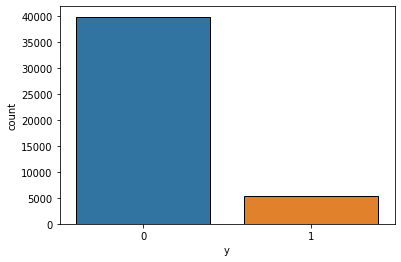

In [23]:

sns.countplot(df['y'], edgecolor = 'black')

#Convert to Code to export data in CSV format
df.to_csv('data_bank_clean.csv', sep=',')

# End of Data Processing

In [24]:
#Convert to Code to export data in CSV format
df.to_csv('data3_clean.csv', sep=',')